### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
d = pd.read_csv('diabetes2.csv')

In [4]:
d

,Glucose,BloodPressure,Insulin,Age,Outcome
0,148,72,0,50,1
1,85,66,0,31,0
2,183,64,0,32,1
3,89,66,94,21,0
4,137,40,168,33,1
...,...,...,...,...,...
763,101,76,180,63,0
764,122,70,0,27,0
765,121,72,112,30,0
766,126,60,0,47,1


In [5]:
d.isnull().sum()

Glucose          0
BloodPressure    0
Insulin          0
Age              0
Outcome          0
dtype: int64

In [6]:
d.describe()

,Glucose,BloodPressure,Insulin,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479,33.240885,0.348958
std,31.972618,19.355807,115.244002,11.760232,0.476951
min,0.000000,0.000000,0.000000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,24.000000,0.000000
50%,117.000000,72.000000,30.500000,29.000000,0.000000
75%,140.250000,80.000000,127.250000,41.000000,1.000000
max,199.000000,122.000000,846.000000,81.000000,1.000000


##  Splitting the independent and dependent variablese

In [7]:
x = d.drop('Outcome', axis = 1) #Independent variables
x

,Glucose,BloodPressure,Insulin,Age
0,148,72,0,50
1,85,66,0,31
2,183,64,0,32
3,89,66,94,21
4,137,40,168,33
...,...,...,...,...
763,101,76,180,63
764,122,70,0,27
765,121,72,112,30
766,126,60,0,47


In [8]:
y = d['Outcome'] #Dependent variable
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

##  Scaling the independent variables

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
sc = StandardScaler()

## Splitting the training and testing data 

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [13]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((614, 4), (154, 4), (614,), (154,))

## KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(5)

In [16]:
knn_mod = knn.fit(xtrain,ytrain)

In [17]:
knn_train_pred = knn_mod.predict(xtrain)

In [18]:
knn_test_pred = knn_mod.predict(xtest)

## Performance metrics

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Acuracy score

In [20]:
print("KNN Training - Accuracy Score:", accuracy_score(ytrain, knn_train_pred))

KNN Training - Accuracy Score: 0.8078175895765473


In [21]:
print("KNN Testing - Accuracy Score:", accuracy_score(ytest, knn_test_pred))

KNN Testing - Accuracy Score: 0.7012987012987013


### Confusion matrix

In [22]:
knn_train_cm = confusion_matrix(ytrain, knn_train_pred)

In [23]:
print("KNN Training - Confusion Matrix \n", knn_train_cm)

KNN Training - Confusion Matrix 
 [[371  38]
 [ 80 125]]


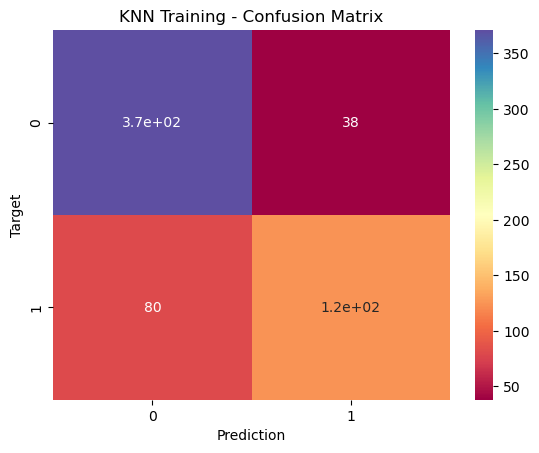

In [24]:
sns.heatmap(knn_train_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Training - Confusion Matrix')
plt.show()

In [25]:
knn_test_cm = confusion_matrix(ytest, knn_test_pred)

In [26]:
print("KNN Testing - Confusion Matrix \n", knn_test_cm)

KNN Testing - Confusion Matrix 
 [[72 19]
 [27 36]]


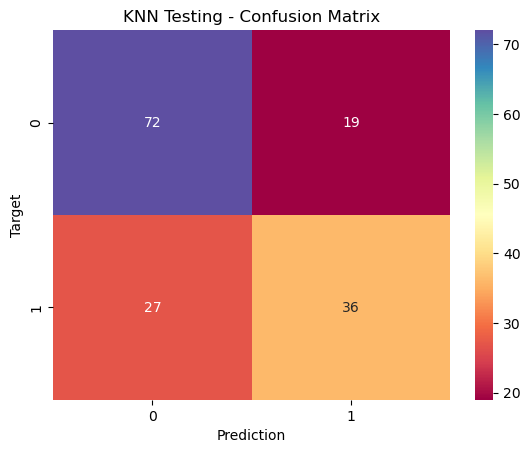

In [27]:
sns.heatmap(knn_test_cm, annot=True, cmap = 'Spectral')
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('KNN Testing - Confusion Matrix')
plt.show()

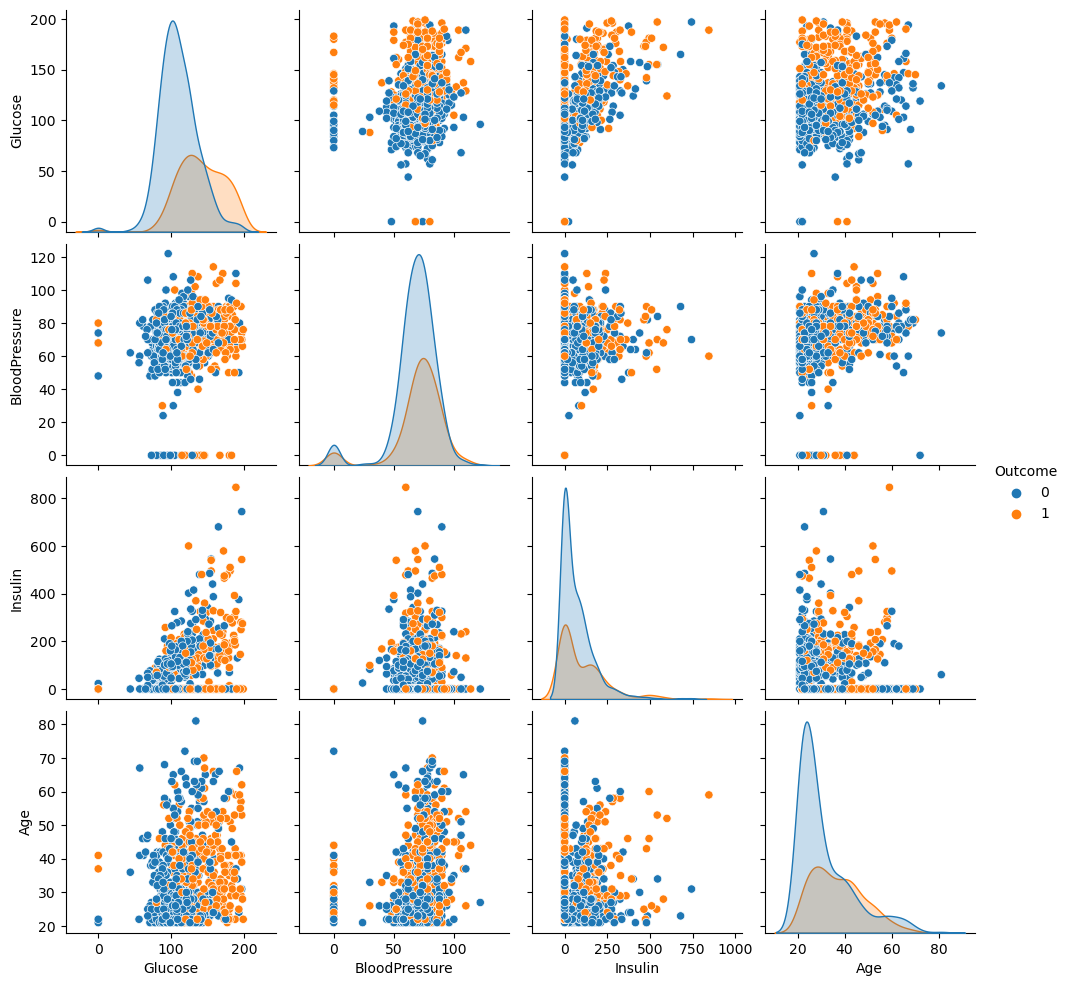

In [28]:
sns.pairplot(d, hue="Outcome")
plt.show()